#  Final Report 
#  Mushrooms Edibility 🍄🍴

## Sommary :

1. **Introduction** 
2. **Importing modules** 
3. **Exploring the data set** 
4. **Munging data** 
    - 4.1 The mushroom's need ID 
    - 4.2 The mushroom's need names
    - 4.3 Reordering columns
    - 4.4 Renaming columns
    
           
5. **Mushroom's anatomy**
    - 5.1 Mushroom's cap
    - 5.2 Mushroom's gill
    - 5.3 Mushroom's stalk
    - 5.4 Mushroom's ring and veil
    - 5.5 Mushroom's other features
    
    
6. **Mushroom's population and habitat**
    
    
7. **Conclusion**
    
8. If you want to know more about mushrooms

# 1. Introduction

In this project, we will explore the different characteristic of mushrooms and how to recognize them as edible or poisonous.

Data set description : 

>This data set includes descriptions of hypothetical samples corresponding to 23 species of mushrooms drawn from the Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible or definitely poisonous. This latter class was combined with the poisonous one. Each data entry has the full attribute name for each category. This make the data set easier to work with and to be less frustrated in figuring out the meaning behind each record.
The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

We will try to actually see if we can find a pattern of rules for determining the edibility of a mushroom.   

# 2. Importing modules 

Necessary modules for this projects :

In [1]:
import pandas as pd
import numpy as np
import names as names
import matplotlib.pyplot as plt

# 3. Exploring the data set

Read the file : 

In [2]:
shroom = pd.read_csv('data/mushroomsupdated.csv')

Whta the file actually look like :

In [3]:
shroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,Poisonous,Convex,Smooth,Brown,Bruises,Pungent,Free,Close,Narrow,Black,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
1,Edible,Convex,Smooth,Yellow,Bruises,Almond,Free,Close,Broad,Black,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Grasses
2,Edible,Bell,Smooth,White,Bruises,Anise,Free,Close,Broad,Brown,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Meadows
3,Poisonous,Convex,Scaly,White,Bruises,Pungent,Free,Close,Narrow,Brown,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
4,Edible,Convex,Smooth,Green,No Bruises,None,Free,Crowded,Broad,Black,...,Smooth,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses


How many rows and columns ?

In [4]:
shroom.shape

(8124, 23)

What data types is composing this set ?  

In [5]:
pd.DataFrame(shroom.dtypes, columns=['data types'])

,data types
class,object
cap-shape,object
cap-surface,object
cap-color,object
bruises,object
odor,object
gill-attachment,object
gill-spacing,object
gill-size,object
gill-color,object


Is this data set is missing data ? 

In [6]:
 pd.DataFrame(shroom.isnull().sum(), columns=['missing data?'])

,missing data?
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


No missing data.

# 4. Munging data

We will make sure the set is clean before usssing it. 

## 4.1 The mushroom's needs ID 



This data set doesn't have any ID or Key Product so we will create one to help the data manipulation later on.

In [7]:
shroom['index'] = shroom.index + 1
shroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,index
0,Poisonous,Convex,Smooth,Brown,Bruises,Pungent,Free,Close,Narrow,Black,...,White,White,Partial,White,One,Pendant,Black,Scattered,Urban,1
1,Edible,Convex,Smooth,Yellow,Bruises,Almond,Free,Close,Broad,Black,...,White,White,Partial,White,One,Pendant,Brown,Numerous,Grasses,2
2,Edible,Bell,Smooth,White,Bruises,Anise,Free,Close,Broad,Brown,...,White,White,Partial,White,One,Pendant,Brown,Numerous,Meadows,3
3,Poisonous,Convex,Scaly,White,Bruises,Pungent,Free,Close,Narrow,Brown,...,White,White,Partial,White,One,Pendant,Black,Scattered,Urban,4
4,Edible,Convex,Smooth,Green,No Bruises,None,Free,Crowded,Broad,Black,...,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses,5


## 4.2 The mushroom's need names  


We also doesn't have any mushroom's names with is not necessary, but I thought it will be a nice first challenge to implement some.

I find this modules that allow to create [randoms names](https://pypi.org/project/names/). This operation takes between 52 to 102 seconds to run. To anticipate this presentation, a copy with the names already add has been made and will be the data set we will uses from now.

In [8]:
shroom['name'] = ' '
#def name_me(name):
#    return names.get_full_name()
#shroom['name'] = shroom['name'].apply(name_me)
shroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,index,name
0,Poisonous,Convex,Smooth,Brown,Bruises,Pungent,Free,Close,Narrow,Black,...,White,Partial,White,One,Pendant,Black,Scattered,Urban,1,
1,Edible,Convex,Smooth,Yellow,Bruises,Almond,Free,Close,Broad,Black,...,White,Partial,White,One,Pendant,Brown,Numerous,Grasses,2,
2,Edible,Bell,Smooth,White,Bruises,Anise,Free,Close,Broad,Brown,...,White,Partial,White,One,Pendant,Brown,Numerous,Meadows,3,
3,Poisonous,Convex,Scaly,White,Bruises,Pungent,Free,Close,Narrow,Brown,...,White,Partial,White,One,Pendant,Black,Scattered,Urban,4,
4,Edible,Convex,Smooth,Green,No Bruises,None,Free,Crowded,Broad,Black,...,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses,5,


Open and read the new file :

In [9]:
#shroom.to_csv('data/mushroomsupdatedname.csv', index=False)
mushrooms = pd.read_csv('data/mushroomsupdatedname.csv')
mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,index,name
0,Poisonous,Convex,Smooth,Brown,Bruises,Pungent,Free,Close,Narrow,Black,...,White,Partial,White,One,Pendant,Black,Scattered,Urban,1,Kelvin Duncan
1,Edible,Convex,Smooth,Yellow,Bruises,Almond,Free,Close,Broad,Black,...,White,Partial,White,One,Pendant,Brown,Numerous,Grasses,2,Eric Pratt
2,Edible,Bell,Smooth,White,Bruises,Anise,Free,Close,Broad,Brown,...,White,Partial,White,One,Pendant,Brown,Numerous,Meadows,3,Nadine Simpson
3,Poisonous,Convex,Scaly,White,Bruises,Pungent,Free,Close,Narrow,Brown,...,White,Partial,White,One,Pendant,Black,Scattered,Urban,4,Patricia Dory
4,Edible,Convex,Smooth,Green,No Bruises,None,Free,Crowded,Broad,Black,...,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses,5,Pam Bacon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,Edible,Knobbed,Smooth,Brown,No Bruises,None,Attached,Close,Broad,Yellow,...,Orange,Partial,Orange,One,Pendant,Buff,Clustered,Leaves,8120,Antonio Benn
8120,Edible,Convex,Smooth,Brown,No Bruises,None,Attached,Close,Broad,Yellow,...,Orange,Partial,Brown,One,Pendant,Buff,Several,Leaves,8121,Beatrice Ennis
8121,Edible,Flat,Smooth,Brown,No Bruises,None,Attached,Close,Broad,Brown,...,Orange,Partial,Orange,One,Pendant,Buff,Clustered,Leaves,8122,Jean Adams
8122,Poisonous,Knobbed,Scaly,Brown,No Bruises,Fishy,Free,Close,Narrow,Buff,...,White,Partial,White,One,Evanescent,White,Several,Leaves,8123,Jan Dalton


Checking if we have only unique value and if not how many unique ones :

In [10]:
mushrooms_copy = mushrooms.copy()
mushrooms_copy['counting'] = mushrooms_copy.name.value_counts()
namecount = mushrooms_copy.groupby('name')['counting'].unique().count()
print('Number of mushrooms with unique names :', namecount)

Number of mushrooms with unique names : 8024


With mean we have 89 mushrooms that are not unique names. That's fine as is not an issues in this study, also IRL people can share a same full name with other so we will let it as it is.

## 4.3 Reordering columns

We are going to change the placement of the columns 'names' and 'index' to the beginning by using the .drop() and .insert()


In [11]:
first = mushrooms['index']
second = mushrooms['name']
mushrooms.drop(columns=['index','name'], inplace = True)               
mushrooms.insert(0, 'index', first)
mushrooms.insert(1, 'name', second)
mushrooms.head()

,index,name,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,Kelvin Duncan,Poisonous,Convex,Smooth,Brown,Bruises,Pungent,Free,Close,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
1,2,Eric Pratt,Edible,Convex,Smooth,Yellow,Bruises,Almond,Free,Close,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Grasses
2,3,Nadine Simpson,Edible,Bell,Smooth,White,Bruises,Anise,Free,Close,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Meadows
3,4,Patricia Dory,Poisonous,Convex,Scaly,White,Bruises,Pungent,Free,Close,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
4,5,Pam Bacon,Edible,Convex,Smooth,Green,No Bruises,None,Free,Crowded,...,Smooth,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses


Some of the other columns are not the most relevant  for the edibility of the mushrooms so we can drop them too.  

In [12]:
mushrooms.drop(columns=['stalk-surface-below-ring','stalk-color-below-ring'], inplace = True)
mushrooms.head()

,index,name,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,...,stalk-root,stalk-surface-above-ring,stalk-color-above-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,Kelvin Duncan,Poisonous,Convex,Smooth,Brown,Bruises,Pungent,Free,Close,...,Equal,Smooth,White,Partial,White,One,Pendant,Black,Scattered,Urban
1,2,Eric Pratt,Edible,Convex,Smooth,Yellow,Bruises,Almond,Free,Close,...,Club,Smooth,White,Partial,White,One,Pendant,Brown,Numerous,Grasses
2,3,Nadine Simpson,Edible,Bell,Smooth,White,Bruises,Anise,Free,Close,...,Club,Smooth,White,Partial,White,One,Pendant,Brown,Numerous,Meadows
3,4,Patricia Dory,Poisonous,Convex,Scaly,White,Bruises,Pungent,Free,Close,...,Equal,Smooth,White,Partial,White,One,Pendant,Black,Scattered,Urban
4,5,Pam Bacon,Edible,Convex,Smooth,Green,No Bruises,None,Free,Crowded,...,Equal,Smooth,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses


## 4.4 Renaming columns

We can now rename the remaning columns + the columns 'class' as it doesn't seams clear what this columns is about, it will be renamed 'edibility'.

In [13]:
dict ={'stalk-surface-above-ring':'stalk-surface',
       'stalk-color-above-ring':'stalk-color',
       'class':'edibility'
      }
mushrooms.rename( columns = dict, inplace = True)
mushrooms.head()

,index,name,edibility,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,...,stalk-root,stalk-surface,stalk-color,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,Kelvin Duncan,Poisonous,Convex,Smooth,Brown,Bruises,Pungent,Free,Close,...,Equal,Smooth,White,Partial,White,One,Pendant,Black,Scattered,Urban
1,2,Eric Pratt,Edible,Convex,Smooth,Yellow,Bruises,Almond,Free,Close,...,Club,Smooth,White,Partial,White,One,Pendant,Brown,Numerous,Grasses
2,3,Nadine Simpson,Edible,Bell,Smooth,White,Bruises,Anise,Free,Close,...,Club,Smooth,White,Partial,White,One,Pendant,Brown,Numerous,Meadows
3,4,Patricia Dory,Poisonous,Convex,Scaly,White,Bruises,Pungent,Free,Close,...,Equal,Smooth,White,Partial,White,One,Pendant,Black,Scattered,Urban
4,5,Pam Bacon,Edible,Convex,Smooth,Green,No Bruises,None,Free,Crowded,...,Equal,Smooth,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses


I also realise that the cap-shape columns was having an iregularity. For some reason, the conical value are noted 'c' instead of 'conical'.

In [14]:
print(mushrooms['cap-shape'].unique())
mushrooms['cap-shape'] = mushrooms['cap-shape'].replace({'c': 'Conical'})
print(mushrooms['cap-shape'].unique())

['Convex' 'Bell' 'Sunken' 'Flat' 'Knobbed' 'c']
['Convex' 'Bell' 'Sunken' 'Flat' 'Knobbed' 'Conical']


# 5. Mushroom's anatomy

This data set is composed of a lot of details regarding the mushrooms. Let's group each part of the mushroom together to see if we can have an idea of the distribution between all the parameters. 

## 5.1 Mushroom's cap 

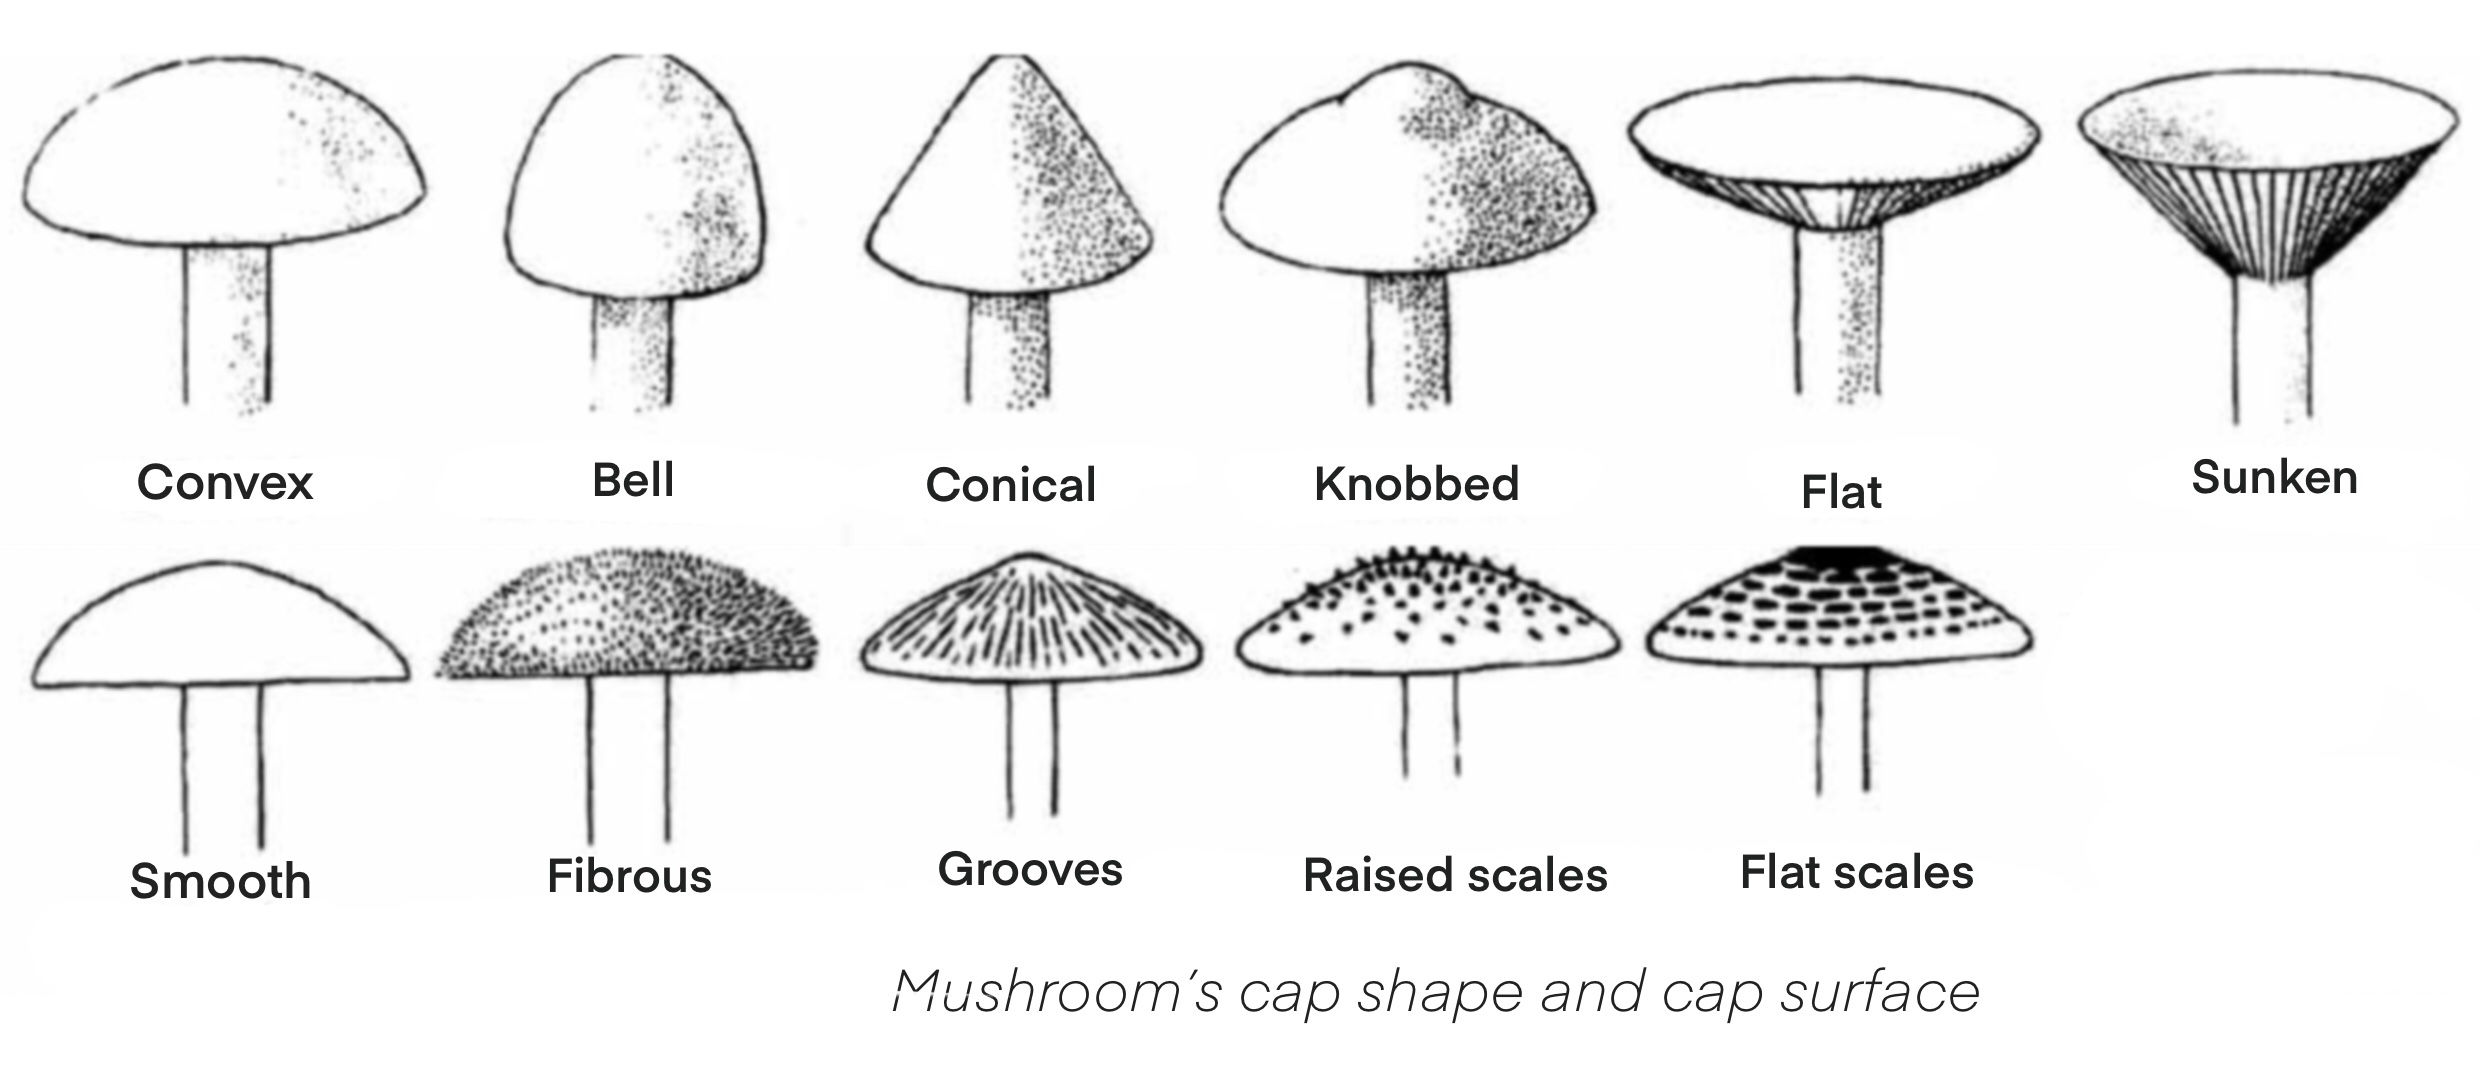

The mushroom Cap is divided by 'cap-shape','cap-surface' and 'cap-color'.

With combination are the most common on poisonous mushrooms ? edible mushrooms ?

Text(0.5, 1.0, "Mushroom's Cap Distribution")

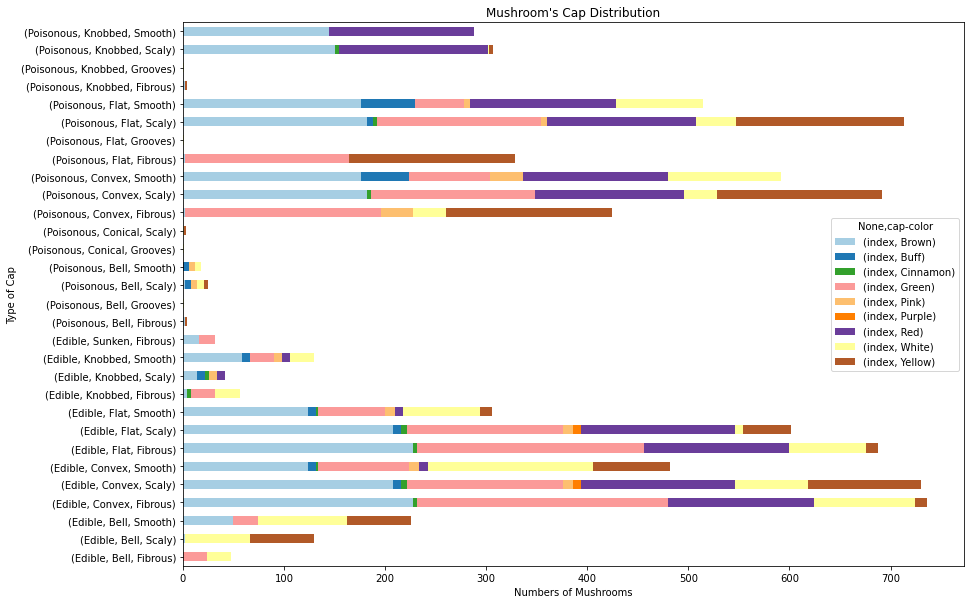

In [15]:
cap_distribution = mushrooms[['edibility','cap-shape','cap-surface','cap-color','index']]\
                  .groupby(['edibility','cap-shape','cap-surface','cap-color']) \
                  .count() \
                  .unstack('cap-color') \
                  .plot.barh(stacked = True, figsize=(14,10), colormap='Paired');
plt.ylabel('Type of Cap')
plt.xlabel('Numbers of Mushrooms')
plt.title("Mushroom's Cap Distribution")

* Poisonous : 
    - mushroom's cap commun cobinaison are flat/smooth, flat/scaly, convex/smooth and convex/scaly. 
    - no sunken cap.
    - main color are brown, green, red, white and yellow.


* Edible :
     - mushroom's cap commun cobinaison are flat/scaly, flat/fibrous, convex/smooth, convex/scaly and convex/fibrous.
     - main color are brown, green, red, white and yellow.
     
     
* In general: 
    - 17 poisonous / 13 edibles.
    - not much bell shape and grooves surface.
    - a lot of flat and convex shape.
    - most are convex fibrous.

## 5.2 Mushroom's gill 

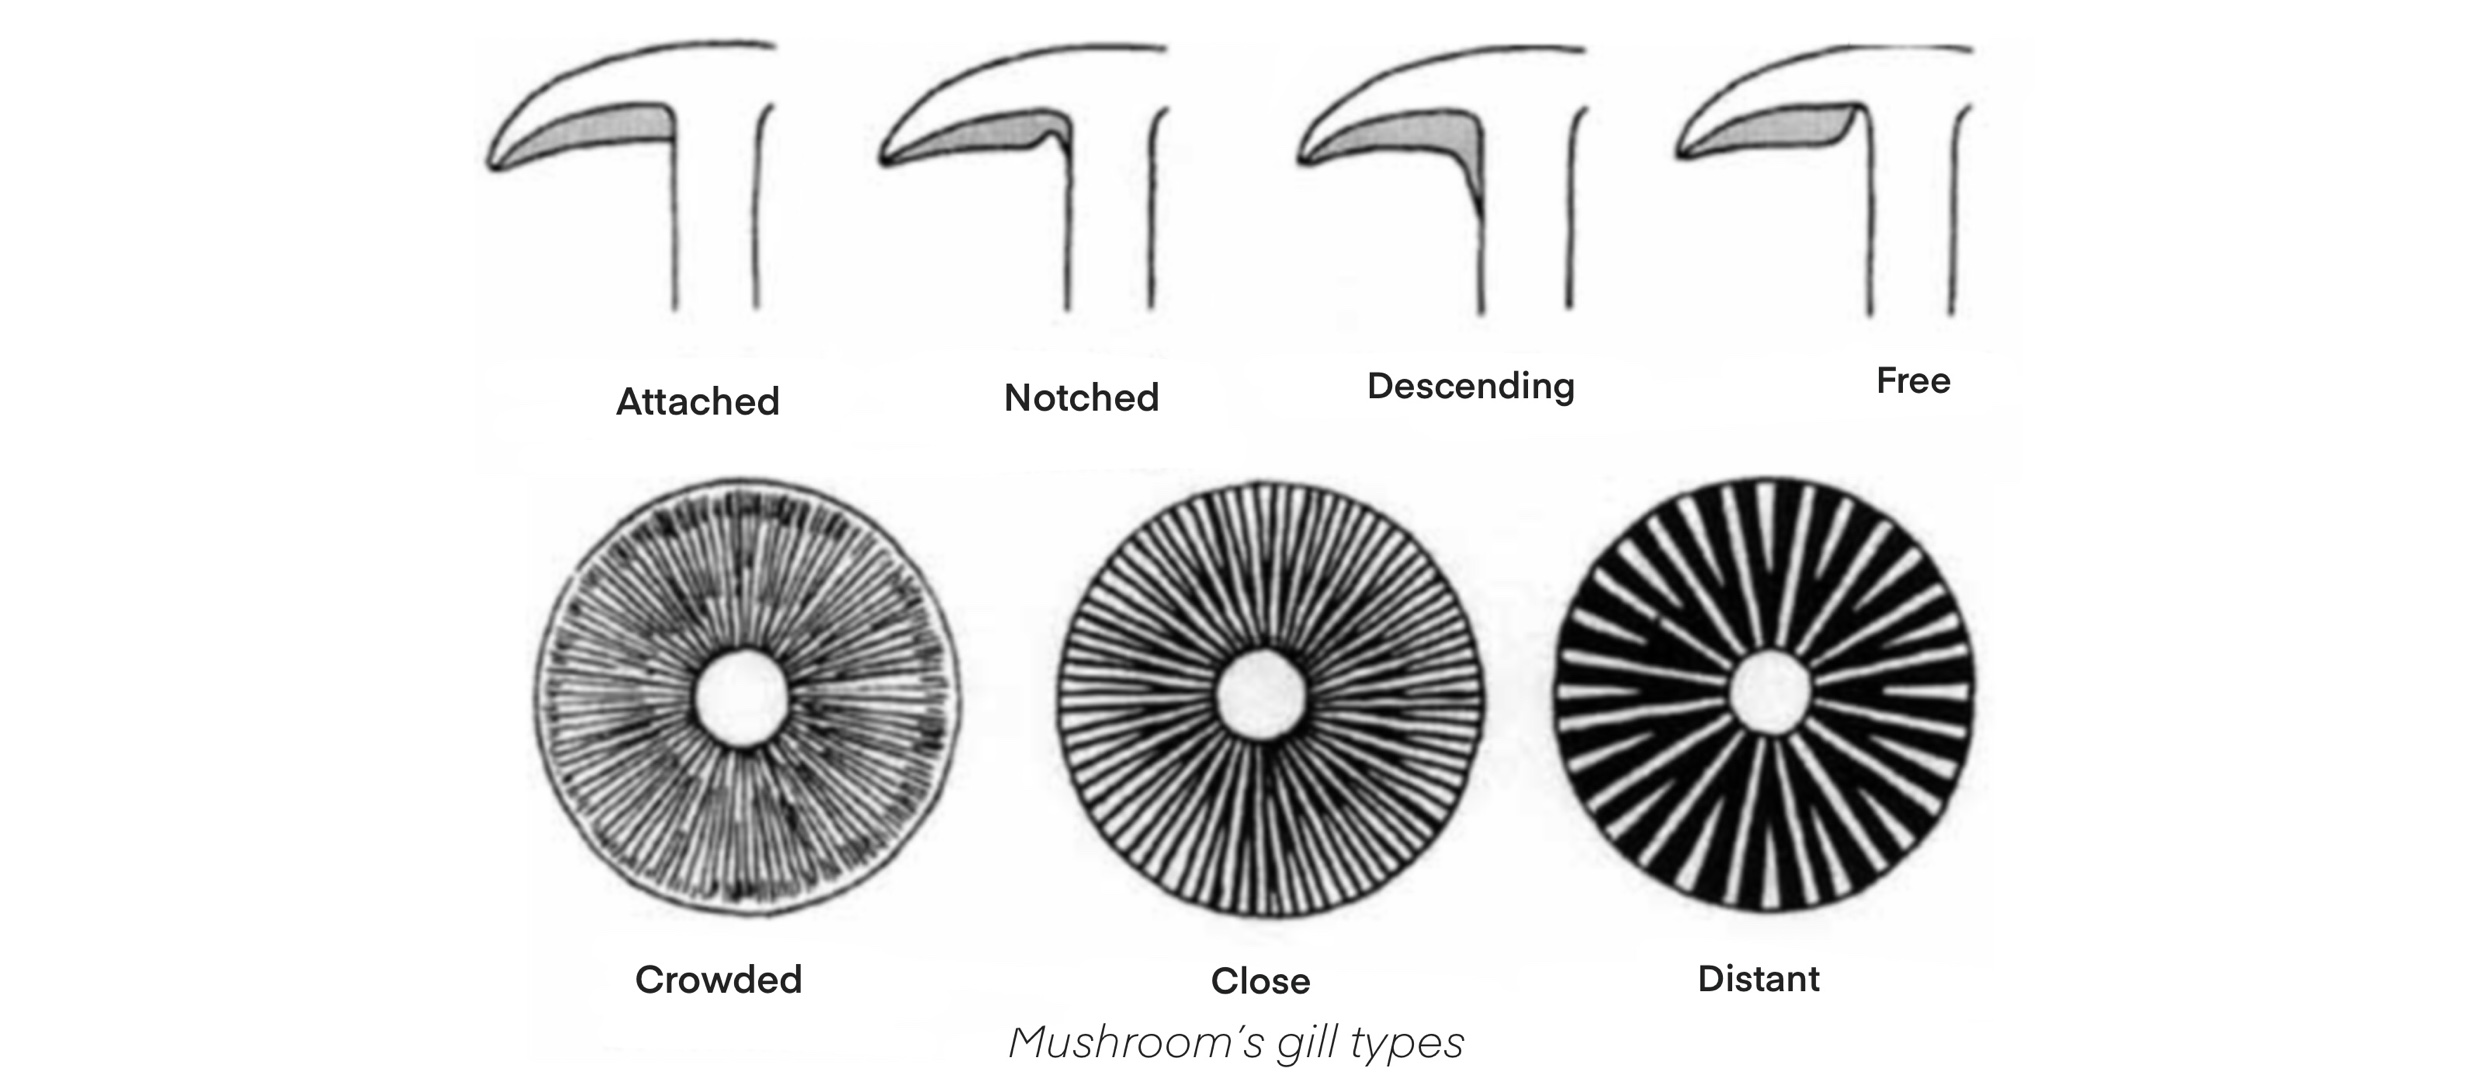

The mushroom Gill is divided by 'gill-attachment','gill-spacing','gill-size' and 'gill-color'.

With combination are the most common on poisonous mushrooms ? edible mushrooms ?

Text(0.5, 1.0, "Mushroom's Gills Distribution")

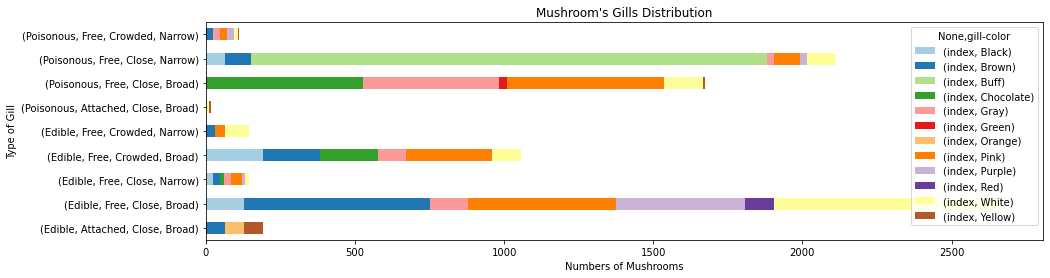

In [16]:
gill_distribution = mushrooms[['edibility','gill-attachment','gill-spacing','gill-size','gill-color','index']]\
                  .groupby(['edibility','gill-attachment','gill-spacing','gill-size','gill-color']) \
                  .count() \
                  .unstack('gill-color') \
                  .plot.barh(stacked = True, figsize=(15,4), colormap='Paired');

plt.ylabel('Type of Gill')
plt.xlabel('Numbers of Mushrooms')
plt.title("Mushroom's Gills Distribution")

* Poisonous : 
    - mushroom's gills commun cobinaison are free/close/narrow and free/close/broad. 
    - main color are buff, chocolate, gray and pink.


* Edible :
     - mushroom's gills commun cobinaison are free/crowded/narrow and free/close/broad.
     - main color are brown, pink, purple and white.
     
     
* In general: 
    - 4 poisonous / 5 edibles.
    - not much attached gill and crowded gill.
    - a lot of flat and convex shape.
    - most are free/close/board.

## 5.3 Mushroom's stalk

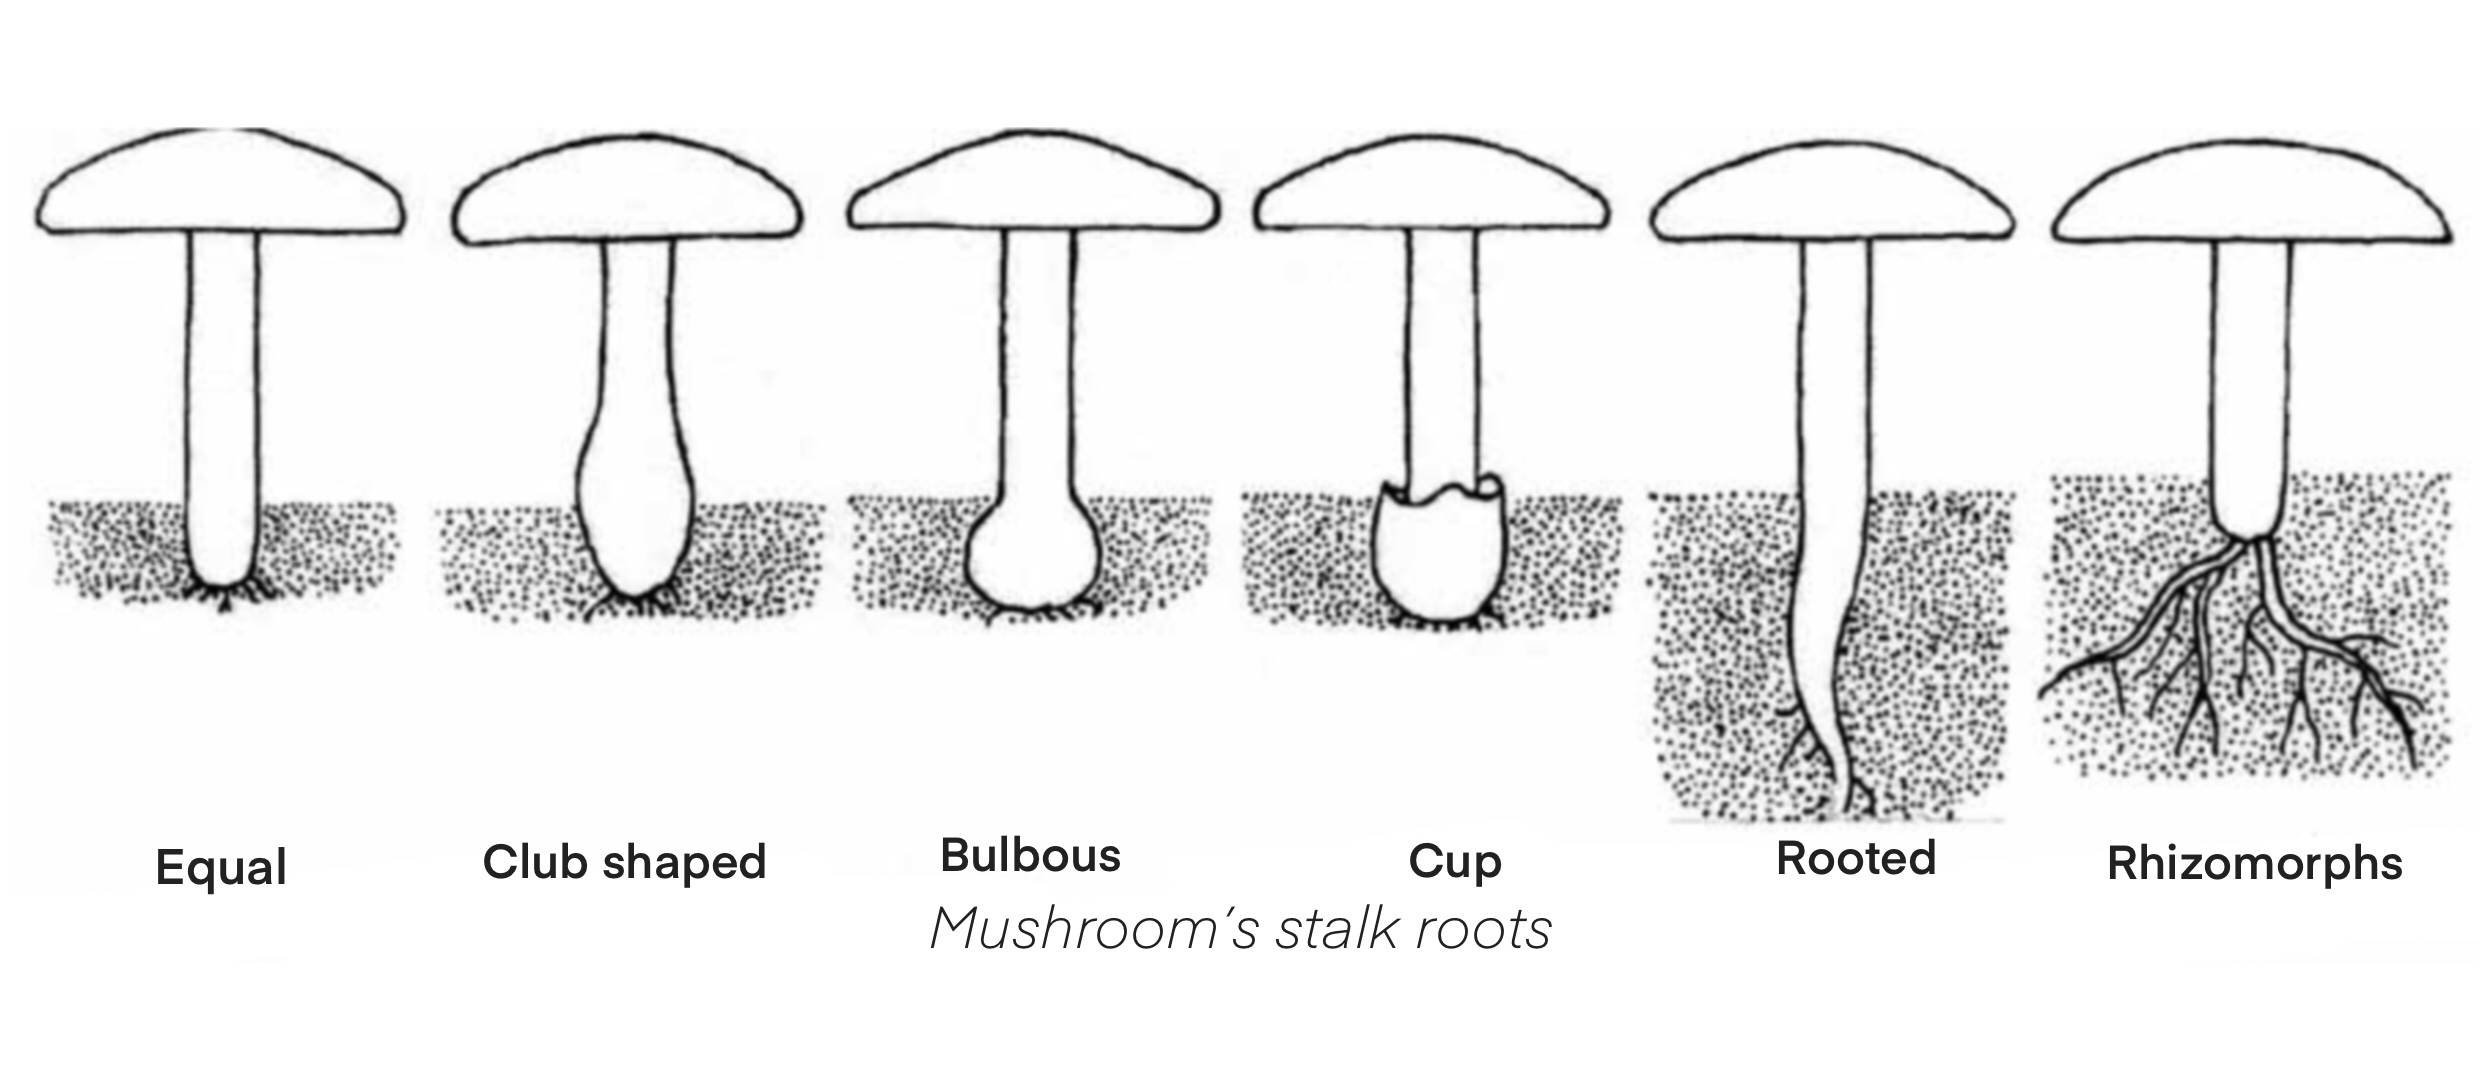

The mushroom Stalk is divided by 'stalk-shape','stalk-root','stalk-surface' and 'stalk-color'.

With combination are the most common on poisonous mushrooms ? edible mushrooms ?

Text(0.5, 1.0, "Mushroom's Stalk Distribution")

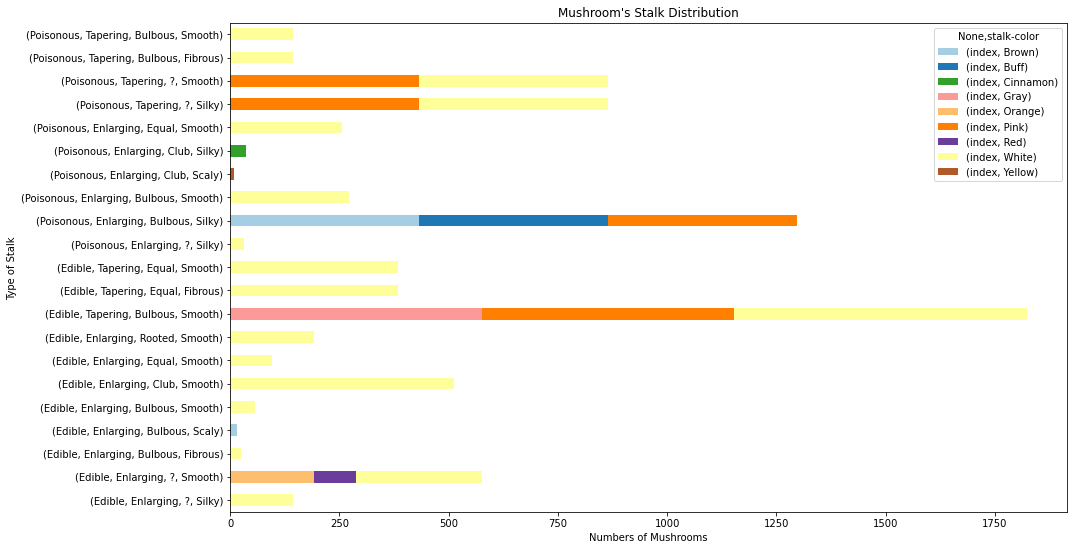

In [17]:
stalk_distribution = mushrooms[['edibility','stalk-shape','stalk-root','stalk-surface','stalk-color','index']]\
                  .groupby(['edibility','stalk-shape','stalk-root','stalk-surface','stalk-color']) \
                  .count() \
                  .unstack('stalk-color') \
                  .plot.barh(stacked = True, figsize=(15,9), colormap='Paired');

plt.ylabel('Type of Stalk')
plt.xlabel('Numbers of Mushrooms')
plt.title("Mushroom's Stalk Distribution")

* Poisonous : 
    - mushroom's stalk commun cobinaison are tapering/missing/smooth, tapering/missing/silky and enlarging/bulbous/smooth. 
    - main color are pink, white, brown and buff.


* Edible :
     - mushroom's stalk commun cobinaison are tapering/bulbous/smooth and free/close/broad.
     - main color are grey, pink and white.
     
     
* In general: 
    - 10 poisonous / 11 edibles.
    - majority of white stalk .
    - a lot of smooth stalk.


## 5.4 Mushroom's ring and veil

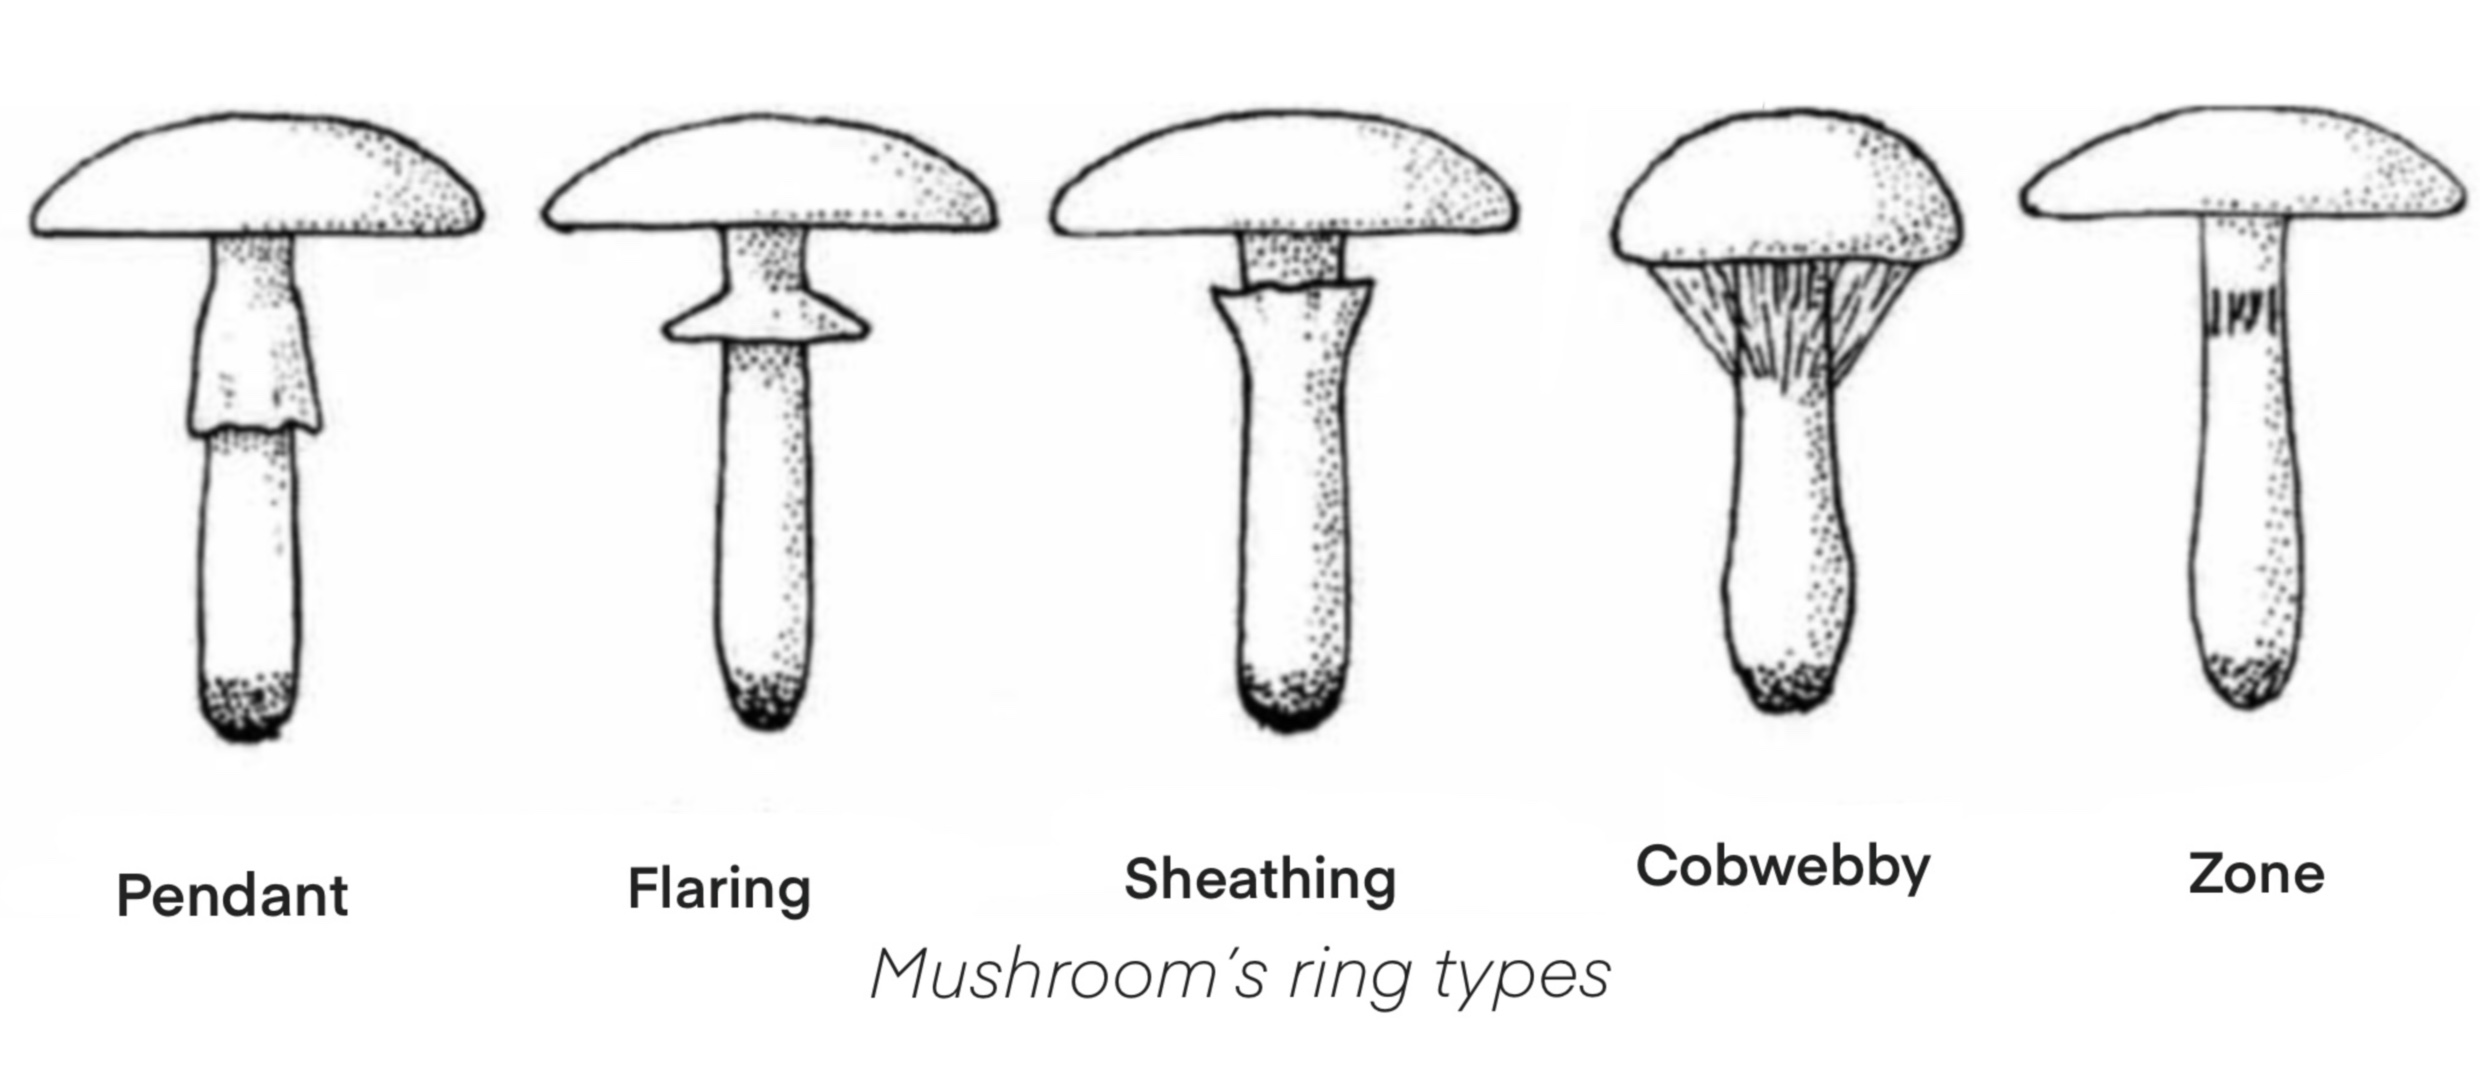

The mushroom Stalk is divided by 'stalk-shape','stalk-root','stalk-surface' and 'stalk-color'.

With combination are the most common on poisonous mushrooms ? edible mushrooms ?

Text(0.5, 1.0, "Mushroom's Ring / Veil Distribution")

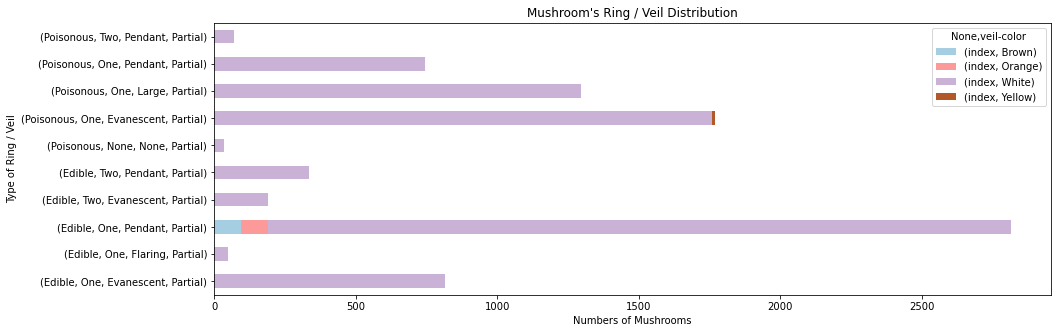

In [18]:
ring_veil_distribution = mushrooms[['edibility','ring-number','ring-type','veil-type','veil-color','index']]\
                        .groupby(['edibility','ring-number','ring-type','veil-type','veil-color']) \
                        .count() \
                        .unstack('veil-color') \
                        .plot.barh(stacked = True, figsize=(15,5), colormap='Paired');

plt.ylabel('Type of Ring / Veil')
plt.xlabel('Numbers of Mushrooms')
plt.title("Mushroom's Ring / Veil Distribution")

* Poisonous : 
    - mushroom's ring / veil commun cobinaison are one/pendant/partial, one/large/partial and one/evanescent/partial. 
    - main color is white.


* Edible :
     - mushroom's ring / veil commun cobinaison are one/pendant/partial and one/evanescent/partial.
     - main color is white.
     
     
* In general: 
    - 5 poisonous / 5 edibles.
    - majority of white ring / veil .
    - a lot of smooth ring / veil.


# 5.5 Mushroom's other features

In this category, will will add all the columns that are not fitting into the four previous ones. This includes bruises, odor and spore color. We will later on uses population and habitat together.

Text(0.5, 1.0, "Mushroom's other features Distribution")

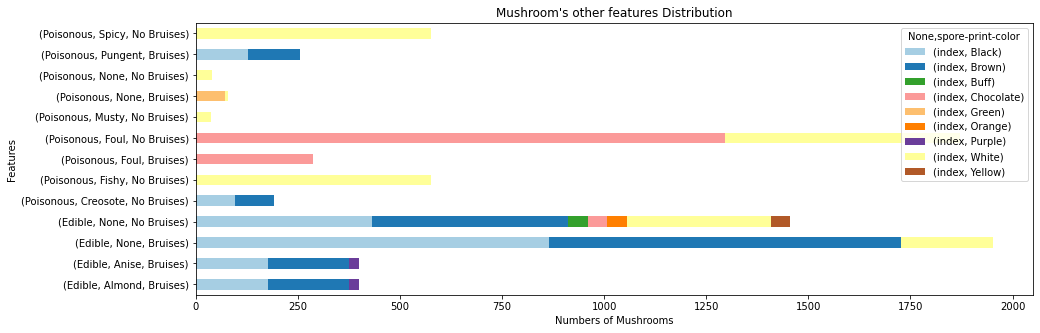

In [19]:
other_features_distribution = mushrooms[['edibility','odor','bruises','spore-print-color','index']]\
                        .groupby(['edibility','odor','bruises','spore-print-color']) \
                        .count() \
                        .unstack('spore-print-color') \
                        .plot.barh(stacked = True, figsize=(15,5), colormap='Paired');

plt.ylabel('Features')
plt.xlabel('Numbers of Mushrooms')
plt.title("Mushroom's other features Distribution")

* Poisonous : 
    - mushroom's spore will be mainly chocolote or white color. 
    - mainly will smell like spicy, foul or fishy. 

* Edible :
     - mushroom's spore will be mainly black, purple or white color. 
     - mainly will smell like nothing.
     
     
* In general: 
    - 9 poisonous / 4 edibles.
    - bruises doesn't seams to be a revelent paramettres in the edibility.
    - smelly mushrooms are more likely to be poisonous

## 6 Mushroom's population and habitat

bla bla

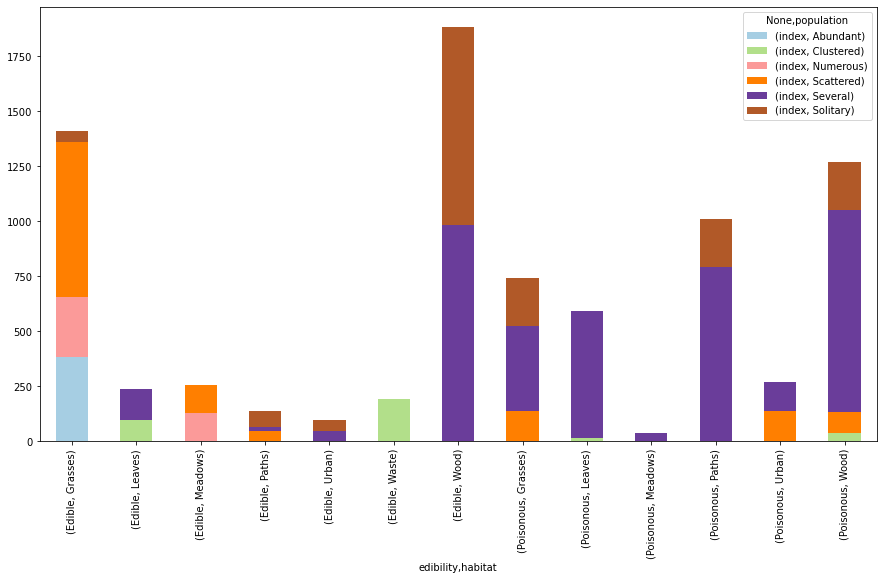

In [20]:
population_distribution = mushrooms[['edibility','population','habitat','index']]\
                        .groupby(['edibility','population','habitat']) \
                        .count() \
                        .unstack('population') \
                        .plot.bar(stacked = True, figsize=(15,8), colormap='Paired');


* Poisonous : 
    - main population type is several and solitary. 
    - main habitat are grasses, leaves, paths and wood.

* Edible :
     - main population type is solitary, several, numerous and scattered.
     - main habitat are wood and grasses.
     
* In general: 
    - 4 poisonous / 6 edibles.
    - urban are mostly poisonous
    - pick of edible ones in the waste

# Conclusion

In fact it's really hard to determinate precises rules to find the good mushrooms, but we did dig some ideas that could help the recognition :


**Edible mushroom most commun features:**
  - cap : flat/scaly, flat/fibrous, convex/smooth, convex/scaly, convex/fibrous and main color are brown, green, red, white and          yellow.
  - gills :  free/crowded/narrow, free/close/broad and main color are brown, pink, purple and white.
  - stalk :  tapering/bulbous/smooth, free/close/broad and main color are grey, pink and white.
  - ring/veil : one/pendant/partial, one/evanescent/partial and main color is white.
  - spore color : black, purple and white.
  - odor : mostly none !
  - population : solitary, several, numerous, scattered.
  - habitat : grases, wood.
  
  
**Poisonous mushroom most commun features:**
  - cap : flat/smooth, flat/scaly, convex/smooth, convex/scaly and main color are brown, green, red, white and yellow.
  - gills : free/close/narrow, free/close/broad and main color are buff, chocolate, gray and pink.
  - stalk : tapering/missing/silky, enlarging/bulbous/smooth and main color are pink, white, brown and buff.
  - ring/veil : one/pendant/partial, one/large/partial, one/evanescent/partial and main color is white.
  - spore color : chocolote, white.
  - odor : spicy, foul, fishy.
  - population : several, solitary.
  - habitat : grasses, leaves, paths, wood.
  
  
*Fun Facts :* My Grand-ma tell me to bite a little bit of mushroom. If it feels neutral is a good on, if it feels bitter or sour split it out ! 




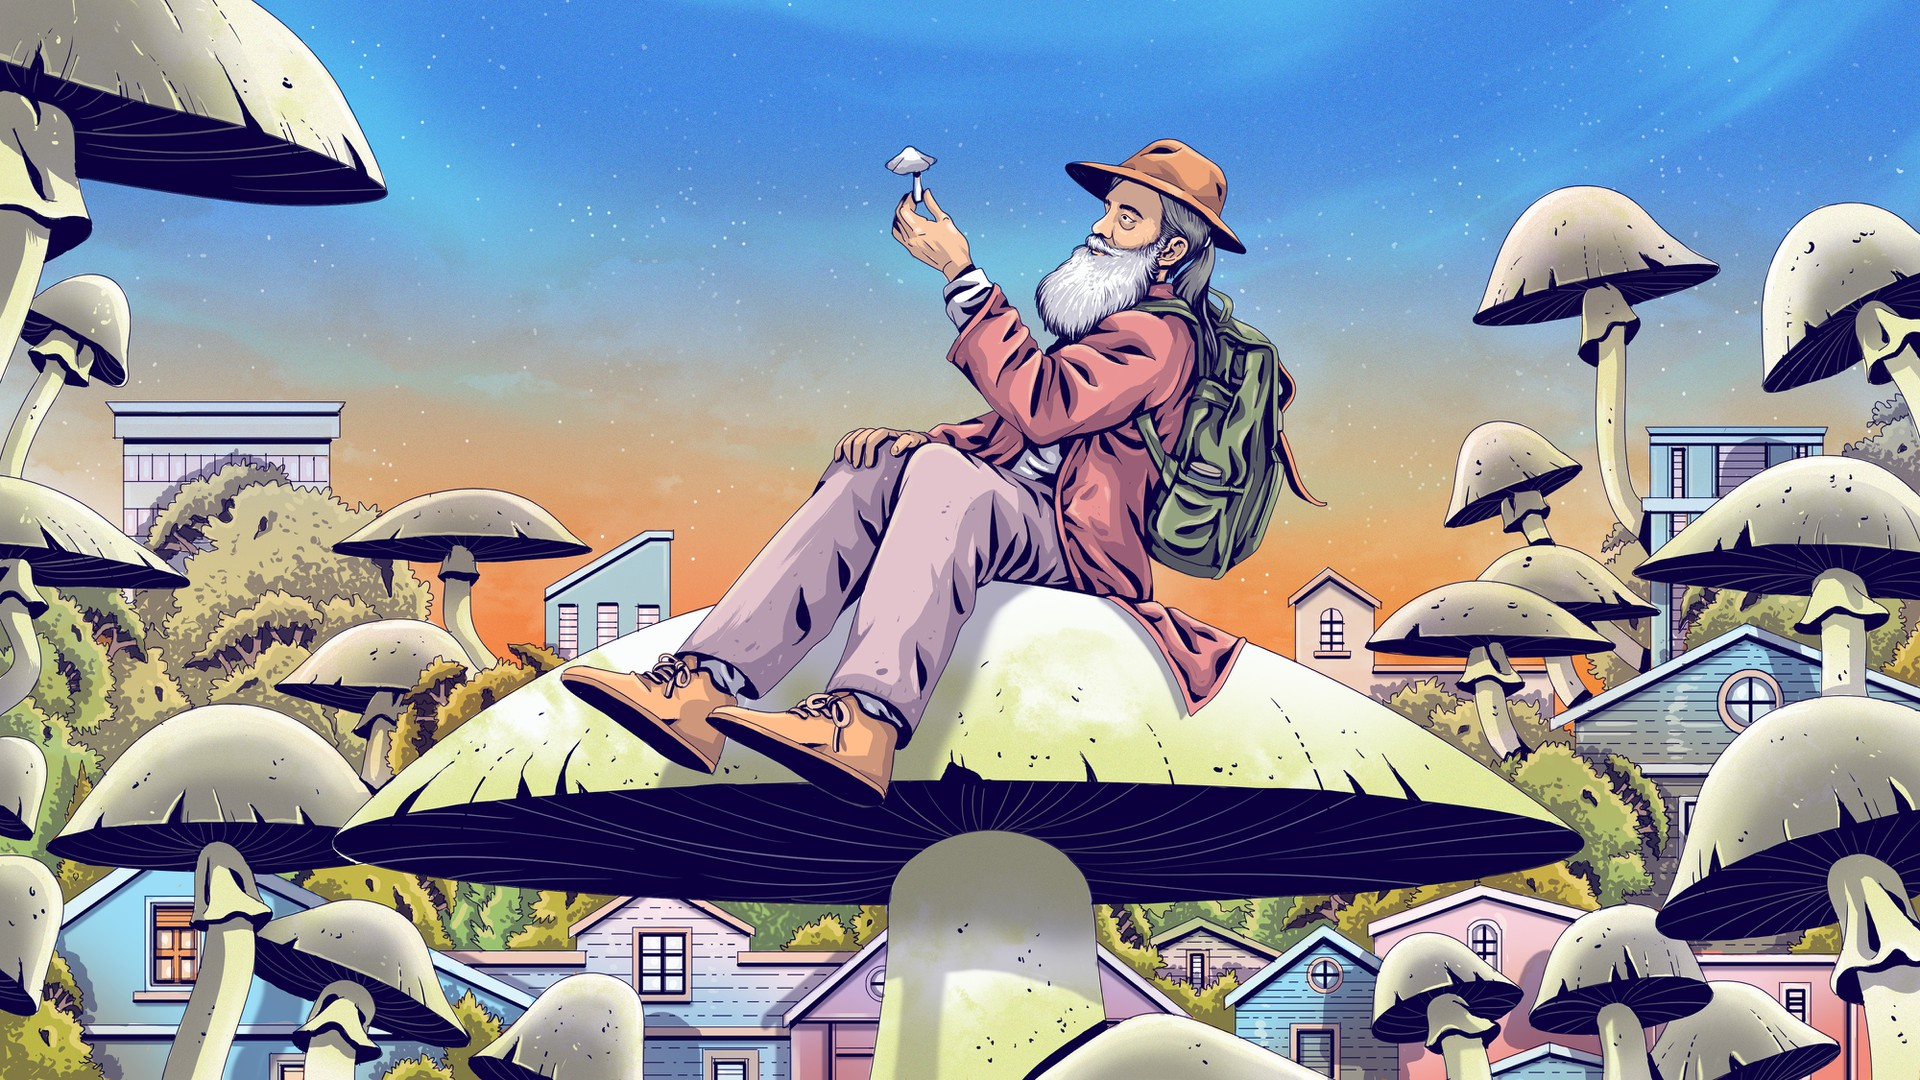

*From this drawing, we can see that the mushrooms grown in urban habitat.
Have a convex, smooth, brown or yellow cap.
The gill is chocolate.
The stalk is buff and have one, pendant ring/veil.*


*Most be poisonous, don't eat it !*

###    If you want to know more about mushrooms 

* [wildfooduk mushroom-guide](https://www.wildfooduk.com/mushroom-guide/) - Identifying Edible and Poisonous Wild Mushrooms in UK 
* [britannica](https://www.britannica.com/list/7-of-the-worlds-most-poisonous-mushrooms) - 7 of the World’s Most Poisonous Mushrooms
* [Psilocybin mushroom](https://en.wikipedia.org/wiki/Psilocybin_mushroom) - aka 'magic mushroom'
